# Total-uncertainty

**Goal:** Max said the total uncertainty plot was *interesting* b/c it helps tell us 
- when we change things the correspondence between individual uncertainties may not be the full story
- the constraint is coming from the huge uncertainty at the peak
- the whole point of high/low HT is to try to prevent high stats at low mass from affecting the high mass constraint

In [5]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoLocator, AutoMinorLocator, MultipleLocator,FixedLocator, LogLocator

import os
os.sys.path += ['../deta_cats/','../non-resonant-studies','../code/']
from statUtils import plotCorrelation
from lim_utils import *
from utils import *
from pull_imp_utils import *
from eventDisplays import rainbow_text

from crypto_utils import *

import logging
for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


**Side note:** Max was enthusiastic about me also comparing to the quadrant NPs, so I think it might be nice to have a (decent?) visualization of this?

**Step 1:** Load in the data

So, I think the best plan here is to make a dictionary of dictionaries (again) haha :)


In [3]:
d = {k: {} for k in ['RSEP','ROHE','QOHE','QSEP']}

**From Liaoshan**

In [5]:
# SEP yrs: rings
BDIR_RSEP    = '../data/RR/cryptotuples/splityr_bkt/'
BFILE_RSEP   = [f"{BDIR_RSEP}/data_baseline_bl_{yr}_NN_100_bootstraps.root" for yr in [16,17,18]] 

In [6]:
d['RSEP'] = load_df(BFILE_RSEP)

In [7]:
e = np.linspace(225,1200,40)

**Other reweightings from Sean**

In [9]:
# OHE yrs: rings
BDIR_ROHE  = '../data/RR/cryptotuples/seanFixOHEyr_bkt/'
BFILE_ROHE = [f"{BDIR_ROHE}/data_baseline_bl_{yr}_NN_100_bootstraps.root" for yr in [16,17,18]]

In [10]:
# OHE yrs: quad
BDIR_QOHE  = '../data/RR/cryptotuples/quad_OHEyr_bkt/'
BFILE_QOHE = [f"{BDIR_QOHE}/data_bl_{yr}_NN_100_bootstraps.root" for yr in [16,17,18]]

In [11]:
# SEP yrs: quad
BDIR_QSEP  = '../data/RR/cryptotuples/quad_splityr_bkt'
BFILE_QSEP = [f"{BDIR_QSEP}/data_bl_{yr}_NN_100_bootstraps.root" for yr in [16,17,18]]

In [12]:
# SEP yrs: quad
BDIR_QSEP_CG  = '../data/RR/cryptotuples/CG_quad_splityr_bkt'
BFILE_QSEP_CG = [f"{BDIR_QSEP_CG}/data{yr}_NN_100_bootstraps.root" for yr in [16,17,18]]

In [13]:
d['ROHE'] = load_df(BFILE_ROHE)

In [14]:
d['QOHE'] = load_df(BFILE_QOHE)

In [15]:
d['QSEP'] = load_df(BFILE_QSEP)

In [16]:
d['QSEP_CG'] = load_df(BFILE_QSEP_CG)

**Step 2:** Define the functions for plotting the *total* uncertainty

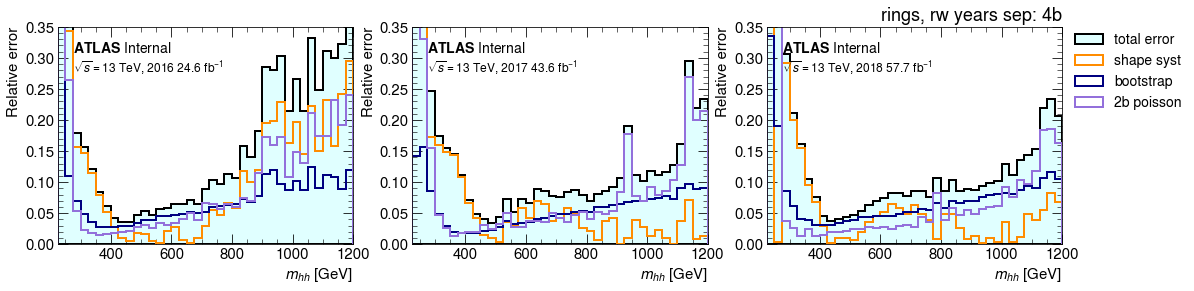

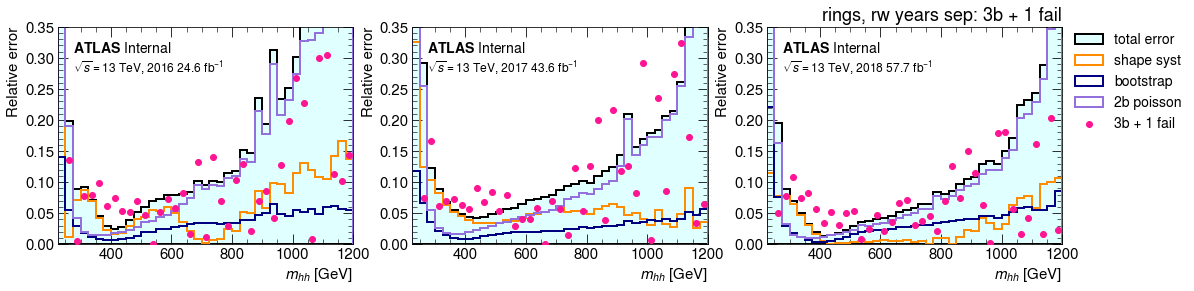

In [21]:
title = 'rings, rw years sep: 4b'
unc_by_yr(d['RSEP'],e,'4b',title=title)

title = 'rings, rw years sep: 3b + 1 fail'
unc_by_yr(d['RSEP'],e,'3b1f',title=title)

**And now with quads...**

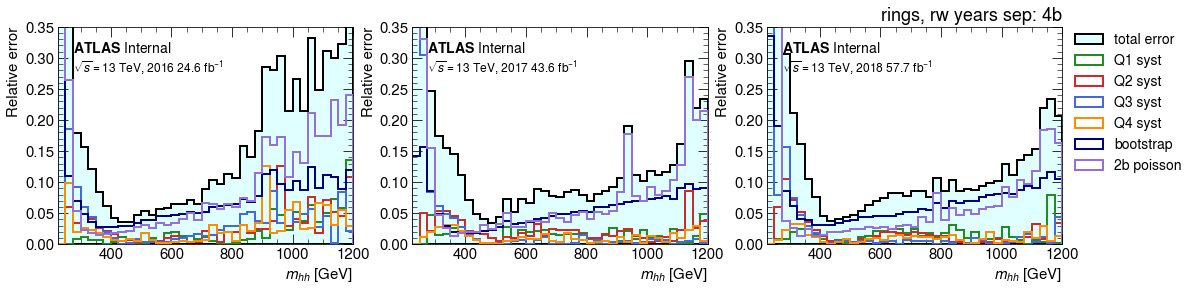

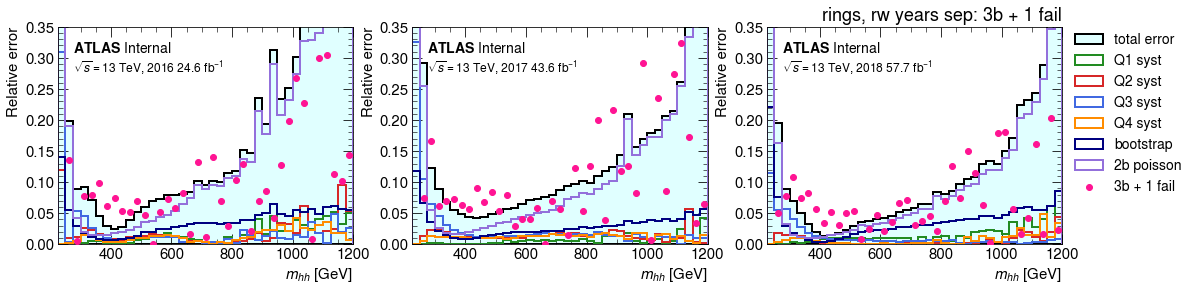

In [22]:
title = 'rings, rw years sep: 4b'
unc_by_yr(d['RSEP'],e,'4b','quad',title=title)

title = 'rings, rw years sep: 3b + 1 fail'
unc_by_yr(d['RSEP'],e,'3b1f','quad',title=title)

In [23]:
title = 'rings, rw years sep: 4b'
unc_by_yr(d['RSEP'],e,'4b','HT',title=title)

title = 'rings, rw years sep: 3b + 1 fail'
unc_by_yr(d['RSEP'],e,'3b1f','HT',title=title)

**What's a good way to viz this?**
- Total unc from *each* of these NP splits, but overlaid?

(I.e, for no split, HT=300 GeV and the quad NPs?)

**Revision:** Actually, I think I'm better off j looking at the total unc not including these shape thingies, b/c I think it really doesn't make sense otherwise.

Ok - I'm super glad I have the syntax up + running, but I think as is these plots aren't *crazy* useful haha.

**Plan:** Make with a resolution parameter!

In [21]:
e_p05 = np.array([275, 289, 303, 318, 334, 351, 369, 387, 406, 426, 447, 469, 492, 
                  517, 543, 570, 598, 628, 659, 692, 727, 763, 801, 841, 883, 927, 
                  973, 1022, 1073])

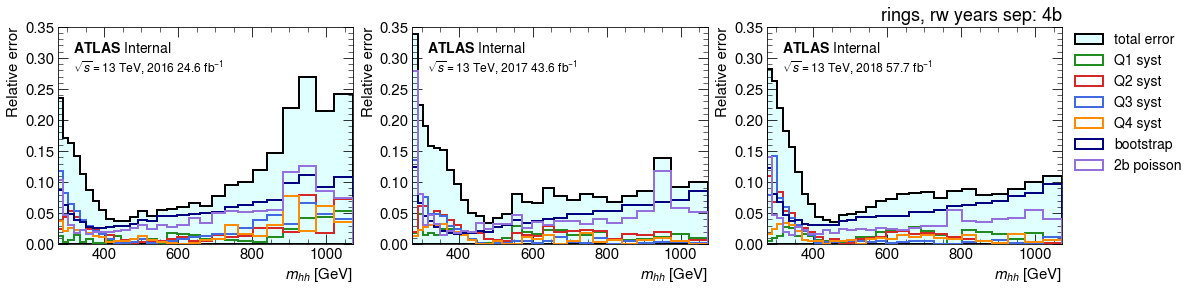

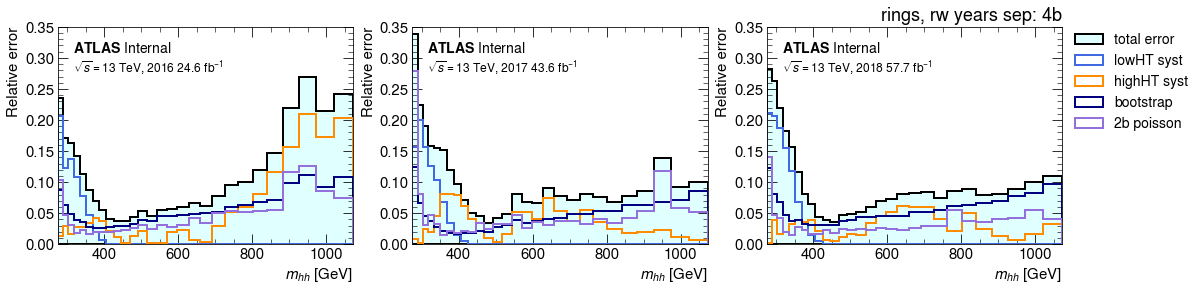

In [26]:
title = 'rings, rw years sep: 4b'
label='_res_p05'

figDir=f'figures/ggF_PUSH/NP_split/RSEP'
unc_by_yr(d['RSEP'],e_p05,'4b','total',True,title=title,figDir=figDir,label=label)
unc_by_yr(d['RSEP'],e_p05,'4b','quad', True,title=title,figDir=figDir,label=label)
unc_by_yr(d['RSEP'],e_p05,'4b','HT',   True,title=title,figDir=figDir,label=label)

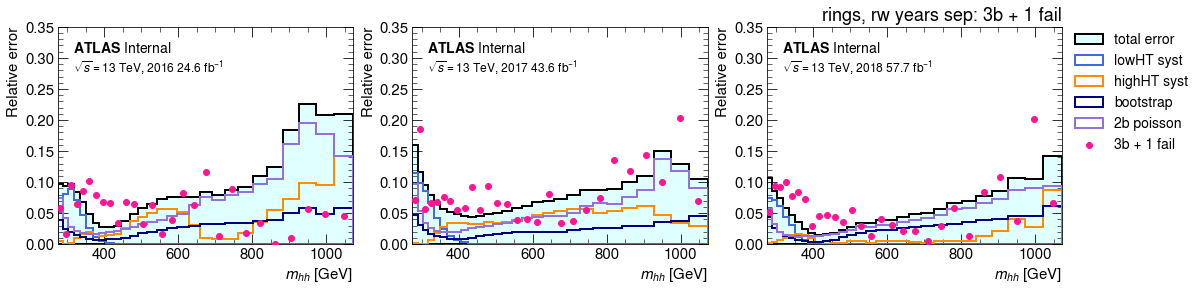

In [27]:
title = 'rings, rw years sep: 3b + 1 fail'

figDir='figures/ggF_PUSH/NP_split/RSEP'
label='_res_p05_sqrt10_poiss'

unc_by_yr(d['RSEP'],e_p05,'3b1f','total',True,title=title,figDir=figDir,label=label)
unc_by_yr(d['RSEP'],e_p05,'3b1f','quad', True,title=title,figDir=figDir,label=label)
unc_by_yr(d['RSEP'],e_p05,'3b1f','HT',   True,title=title,figDir=figDir,label=label)

Yey! I'm *so* excited now :)

Ok, so **next up** let's look at the other trainings we have on the table!!

## Rings: OHE

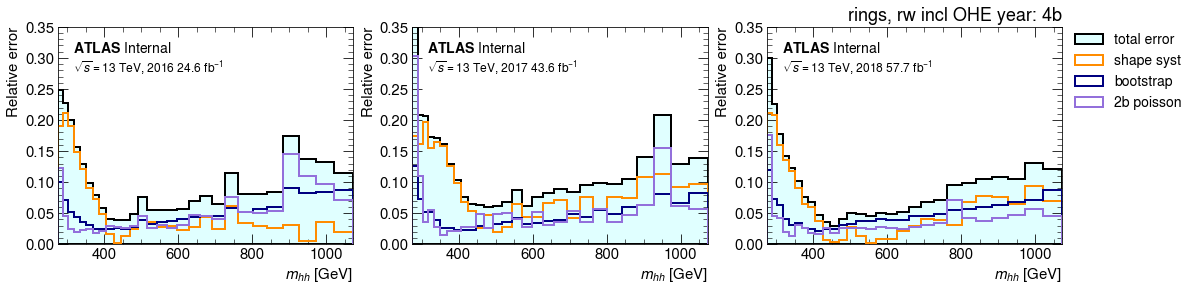

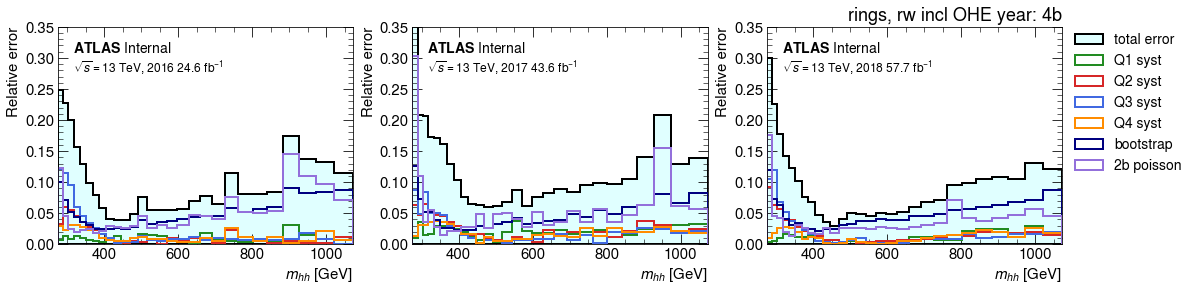

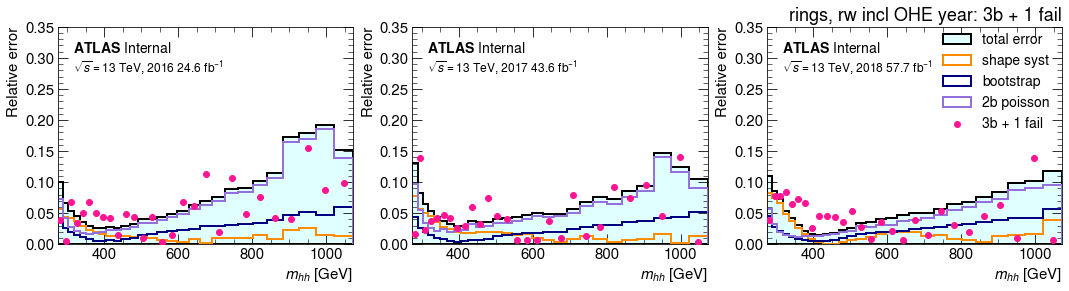

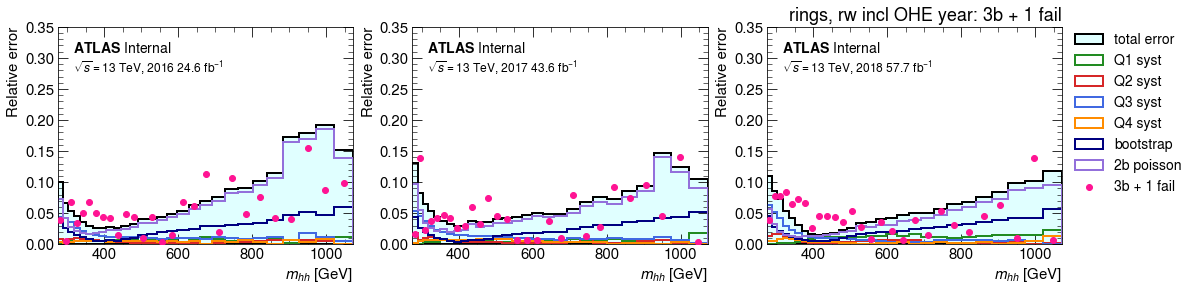

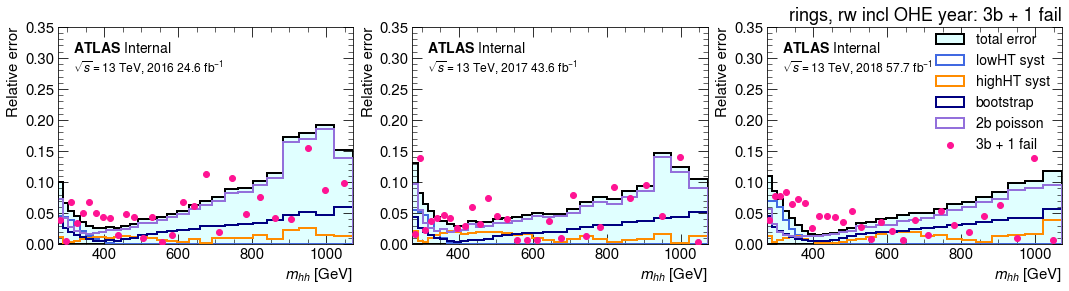

In [28]:
base = 'rings, rw incl OHE year: '
k = 'ROHE'
figDir=f'figures/ggF_PUSH/NP_split/{k}'

# 4b
title = base + '4b'
label='_res_p05'

unc_by_yr(d[k],e_p05,'4b','total',True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'4b','quad', True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'4b','HT',   True,title=title,figDir=figDir,label=label)

# 3b + 1 fail
title = base + '3b + 1 fail'
label='_res_p05_sqrt10_poiss'

unc_by_yr(d[k],e_p05,'3b1f','total',True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'3b1f','quad', True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'3b1f','HT',   True,title=title,figDir=figDir,label=label)

## Quads: OHE

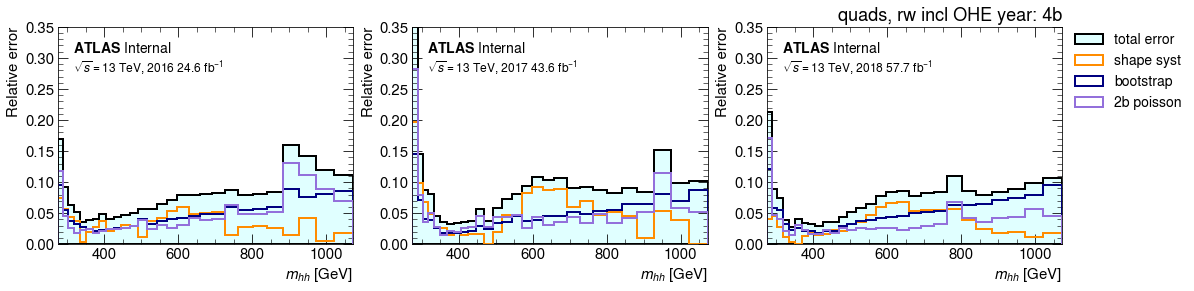

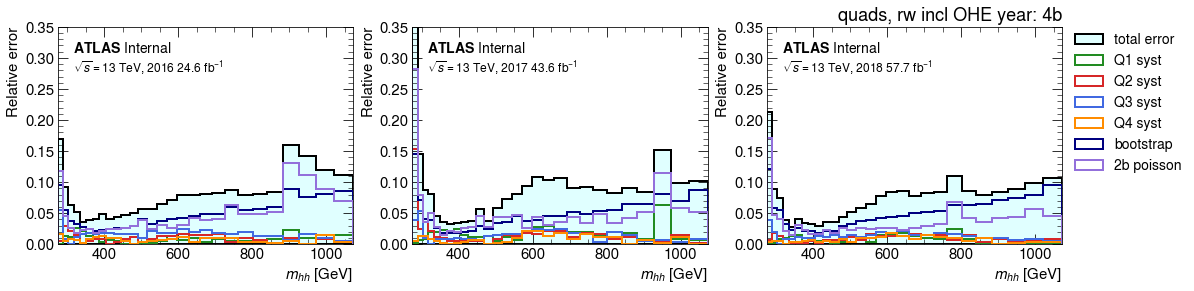

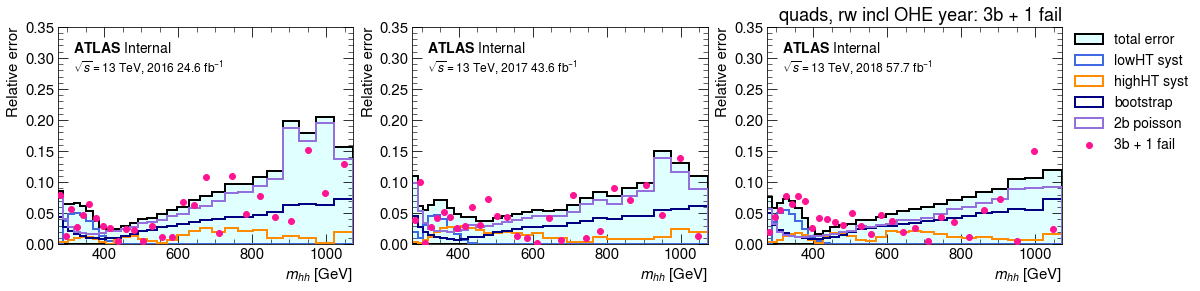

In [29]:
base = 'quads, rw incl OHE year: '
k = 'QOHE'
figDir=f'figures/ggF_PUSH/NP_split/{k}'

# 4b
title = base + '4b'
label='_res_p05'

unc_by_yr(d[k],e_p05,'4b','total',True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'4b','quad', True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'4b','HT',   True,title=title,figDir=figDir,label=label)

# 3b + 1 fail
title = base + '3b + 1 fail'
label='_res_p05_sqrt10_poiss'

unc_by_yr(d[k],e_p05,'3b1f','total',True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'3b1f','quad', True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'3b1f','HT',   True,title=title,figDir=figDir,label=label)

## Quads: rw years separately

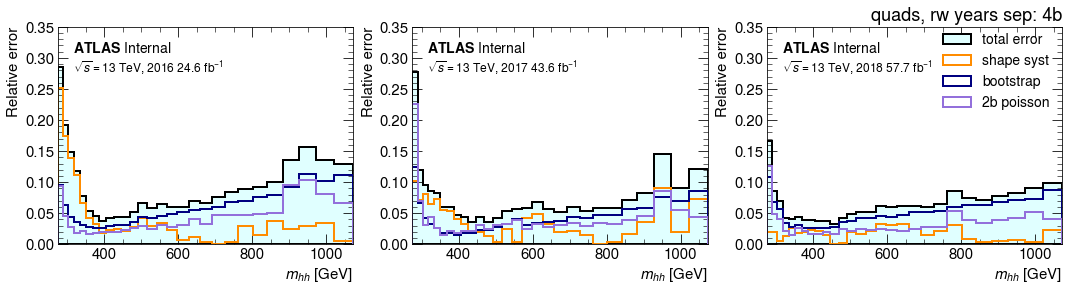

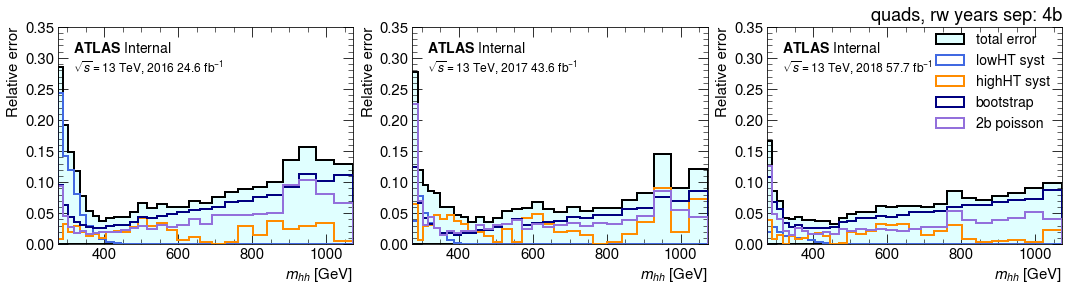

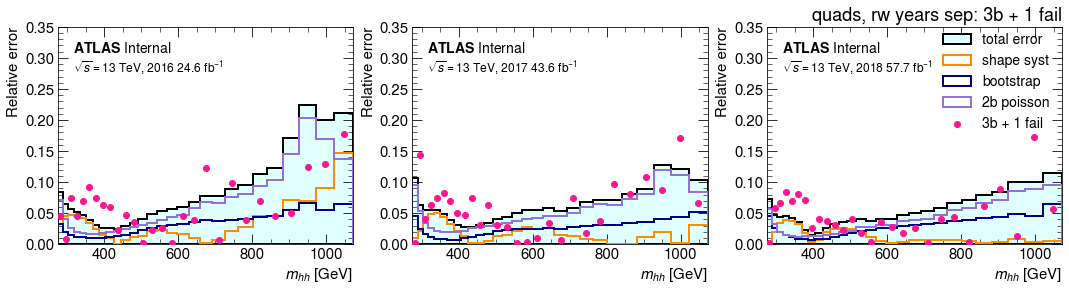

In [30]:
base = 'quads, rw years sep: '
k = 'QSEP'
figDir=f'figures/ggF_PUSH/NP_split/{k}'

# 4b
title = base + '4b'
label='_res_p05'

unc_by_yr(d[k],e_p05,'4b','total',True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'4b','quad', True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'4b','HT',   True,title=title,figDir=figDir,label=label)

# 3b + 1 fail
title = base + '3b + 1 fail'
label='_res_p05_sqrt10_poiss'

unc_by_yr(d[k],e_p05,'3b1f','total',True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'3b1f','quad', True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'3b1f','HT',   True,title=title,figDir=figDir,label=label)

# CG Quads, rw years separately

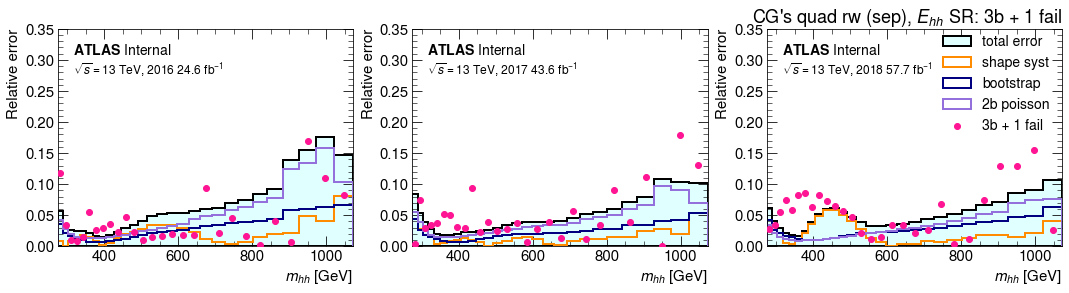

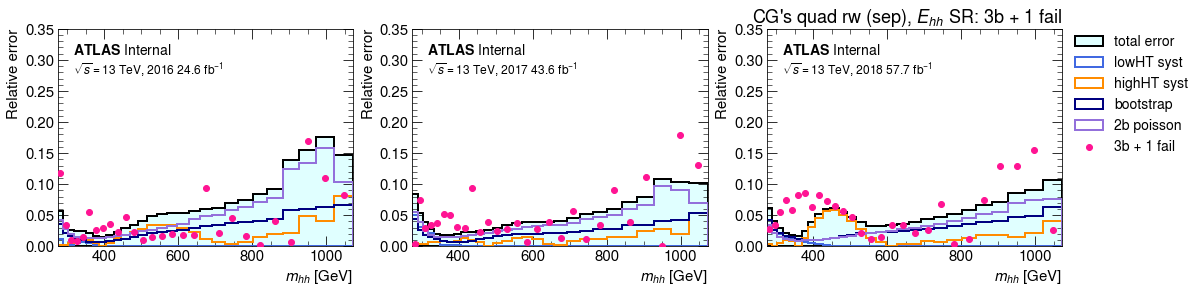

In [31]:
base = 'CG\'s quad rw (sep), $E_{hh}$ SR: '
k = 'QSEP_CG'
figDir=f'figures/ggF_PUSH/NP_split/{k}'

# 4b
title = base + '4b'
label='_res_p05'

unc_by_yr(d[k],e_p05,'4b','total',True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'4b','quad', True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'4b','HT',   True,title=title,figDir=figDir,label=label)

# 3b + 1 fail
title = base + '3b + 1 fail'
label='_res_p05_sqrt10_poiss'

unc_by_yr(d[k],e_p05,'3b1f','total',True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'3b1f','quad', True,title=title,figDir=figDir,label=label)
unc_by_yr(d[k],e_p05,'3b1f','HT',   True,title=title,figDir=figDir,label=label)

var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var 

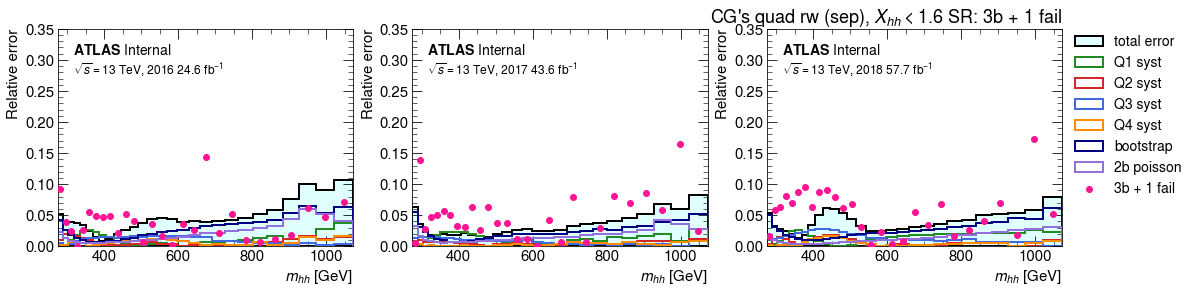

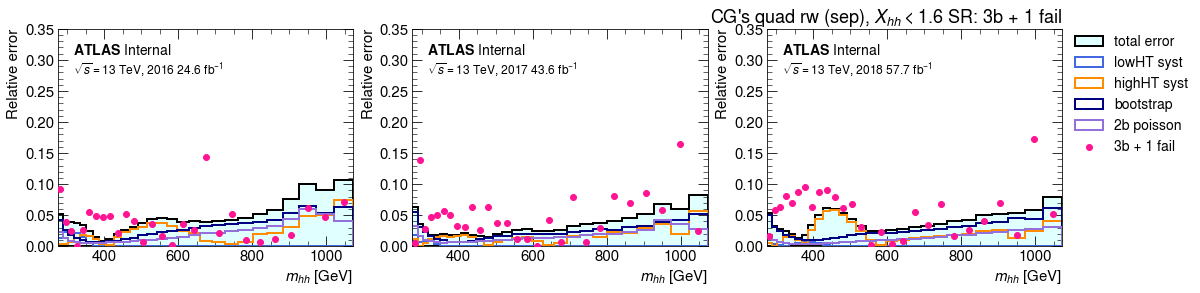

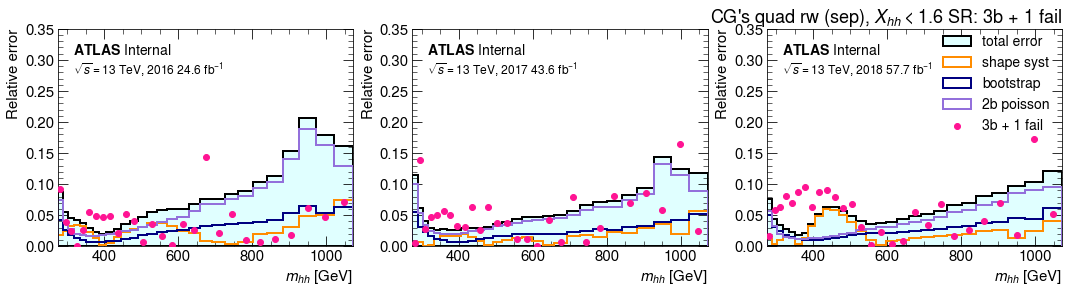

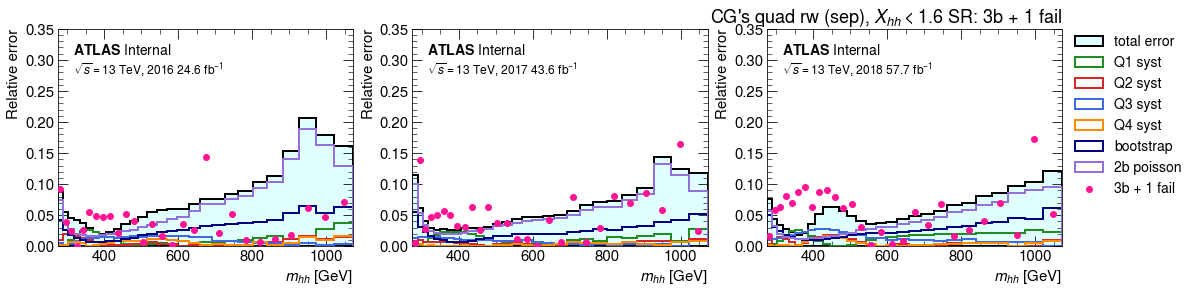

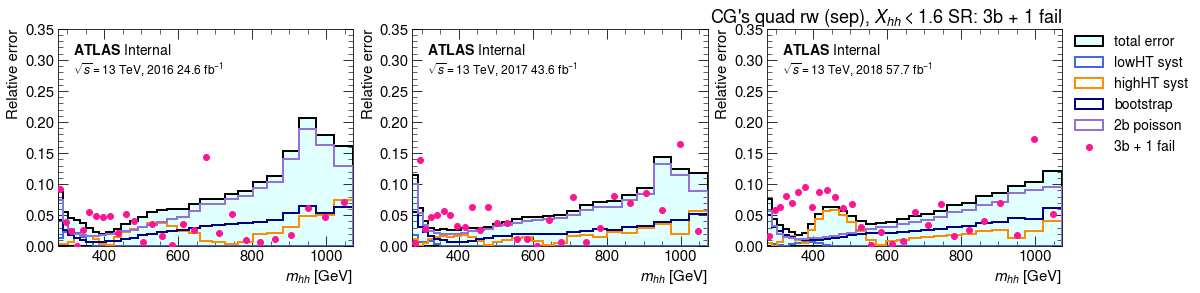

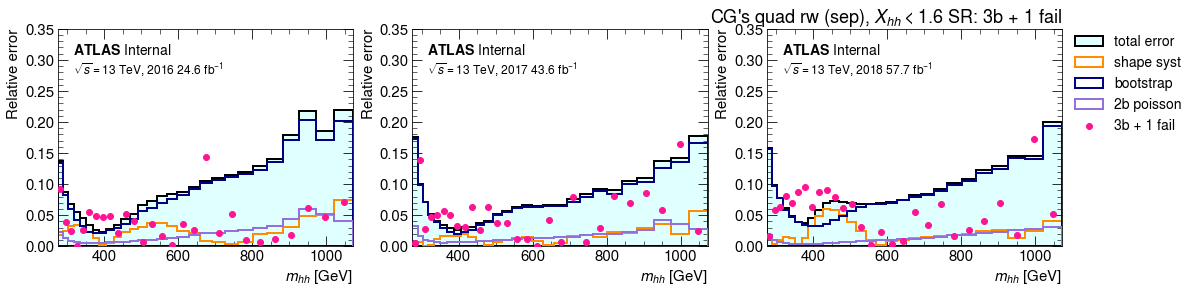

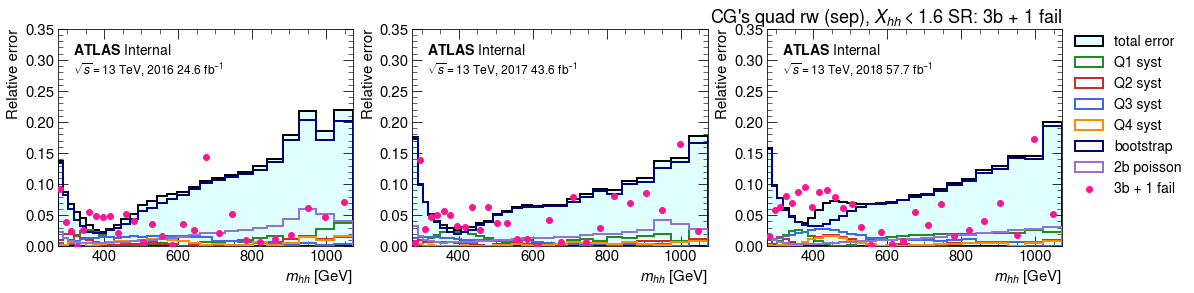

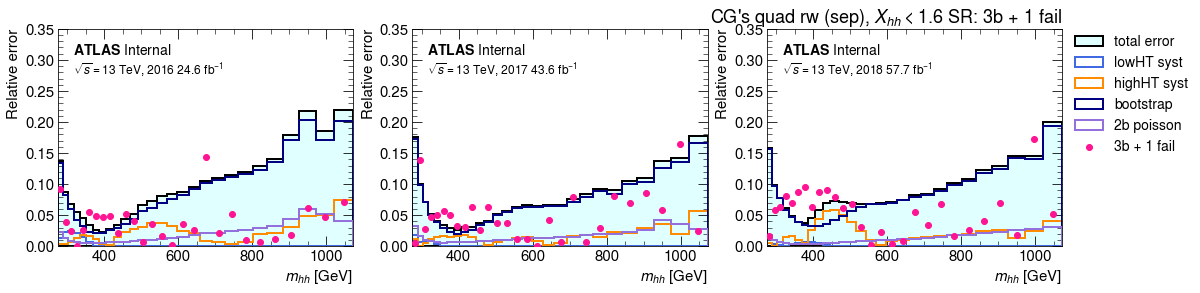

In [24]:
base = 'CG\'s quad rw (sep), $X_{hh}<1.6$ SR: '
k = 'QSEP_CG'
figDir=f'figures/ggF_PUSH/NP_split/{k}'

# 4b
# title = base + '4b'
# label='_res_p05_nomSR'

# unc_by_yr(d[k],e_p05,'4b','total',True,title=title,figDir=figDir,label=label,nomSR=True)
# unc_by_yr(d[k],e_p05,'4b','quad', True,title=title,figDir=figDir,label=label,nomSR=True)
# unc_by_yr(d[k],e_p05,'4b','HT',   True,title=title,figDir=figDir,label=label,nomSR=True)

# 3b + 1 fail
title = base + '3b + 1 fail'
label='_res_p05_nomSR'

unc_by_yr(d[k],e_p05,'3b1f','total',True,title=title,figDir=figDir,label=label,nomSR=True,scale='none')
unc_by_yr(d[k],e_p05,'3b1f','quad', True,title=title,figDir=figDir,label=label,nomSR=True,scale='none')
unc_by_yr(d[k],e_p05,'3b1f','HT',   True,title=title,figDir=figDir,label=label,nomSR=True,scale='none')


label='_res_p05_sqrt10_poiss_nomSR'
unc_by_yr(d[k],e_p05,'3b1f','total',True,title=title,figDir=figDir,label=label,nomSR=True)
unc_by_yr(d[k],e_p05,'3b1f','quad', True,title=title,figDir=figDir,label=label,nomSR=True)
unc_by_yr(d[k],e_p05,'3b1f','HT',   True,title=title,figDir=figDir,label=label,nomSR=True)


label='_res_p05_sqrt10_poiss_bs_nomSR'
unc_by_yr(d[k],e_p05,'3b1f','total',True,title=title,figDir=figDir,label=label,nomSR=True,scale='bs')
unc_by_yr(d[k],e_p05,'3b1f','quad', True,title=title,figDir=figDir,label=label,nomSR=True,scale='bs')
unc_by_yr(d[k],e_p05,'3b1f','HT',   True,title=title,figDir=figDir,label=label,nomSR=True,scale='bs')

**Q from Rui:** How should the BS error scale when we increase the stats?

In [33]:
d[k].keys()

dict_keys(['df_16', 'norm_16', 'norm_VR_16', 'norm_IQR_16', 'norm_3b1f_16', 'norm_VR_3b1f_16', 'norm_IQR_3b1f_16', 'df_17', 'norm_17', 'norm_VR_17', 'norm_IQR_17', 'norm_3b1f_17', 'norm_VR_3b1f_17', 'norm_IQR_3b1f_17', 'df_18', 'norm_18', 'norm_VR_18', 'norm_IQR_18', 'norm_3b1f_18', 'norm_VR_3b1f_18', 'norm_IQR_3b1f_18', 'bkg_16', 'b_vr_16', 'bs_16', 'poiss_16', 'lowHT_16', 'highHT_16', 'Q1_16', 'Q2_16', 'Q3_16', 'Q4_16', 'bkg_3b1f_16', 'b_vr_3b1f_16', 'bs_3b1f_16', 'poiss_3b1f_16', 'lowHT_3b1f_16', 'highHT_3b1f_16', 'Q1_3b1f_16', 'Q2_3b1f_16', 'Q3_3b1f_16', 'Q4_3b1f_16', 'obs_3b1f_16', 'bkg_17', 'b_vr_17', 'bs_17', 'poiss_17', 'lowHT_17', 'highHT_17', 'Q1_17', 'Q2_17', 'Q3_17', 'Q4_17', 'bkg_3b1f_17', 'b_vr_3b1f_17', 'bs_3b1f_17', 'poiss_3b1f_17', 'lowHT_3b1f_17', 'highHT_3b1f_17', 'Q1_3b1f_17', 'Q2_3b1f_17', 'Q3_3b1f_17', 'Q4_3b1f_17', 'obs_3b1f_17', 'bkg_18', 'b_vr_18', 'bs_18', 'poiss_18', 'lowHT_18', 'highHT_18', 'Q1_18', 'Q2_18', 'Q3_18', 'Q4_18', 'bkg_3b1f_18', 'b_vr_3b1f_18', '

In [34]:
e_p05

array([ 275,  289,  303,  318,  334,  351,  369,  387,  406,  426,  447,
        469,  492,  517,  543,  570,  598,  628,  659,  692,  727,  763,
        801,  841,  883,  927,  973, 1022, 1073])

(0.0, 67.18703157317378)

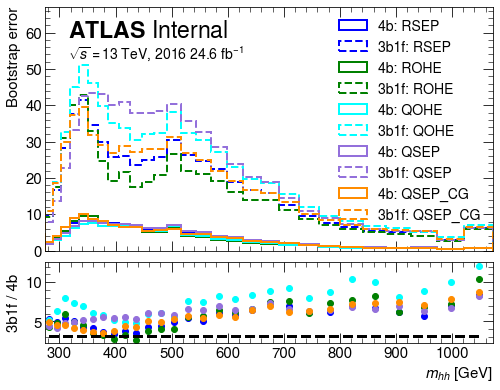

In [35]:
xx = 0.5 * ( e_p05[1:] + e_p05[:-1] )
lw = 2

fig, ax = plt.subplots(2,1, figsize=(7.75, 5.92), sharex=True,
                       gridspec_kw={"height_ratios": [.75, .25], "hspace":0.07, 
                                    "left":0.098, "bottom":0.09})
yr=16

for k, c in zip(['RSEP','ROHE','QOHE','QSEP','QSEP_CG'],
                ['b','g','cyan','mediumpurple','darkorange']):

    ax[0].hist(xx,e_p05,histtype='step',lw=lw,color=c,label=f'4b: {k}',
               weights=d[k][f'bs_{yr}'])
    ax[0].hist(xx,e_p05,histtype='step',lw=lw,color=c,label=f'3b1f: {k}',ls='--',
               weights=d[k][f'bs_3b1f_{yr}'])
    
    ax[1].plot(xx,d[k][f'bs_3b1f_{yr}']/d[k][f'bs_{yr}'],marker='o',lw=0,color=c)
    
    
ax[1].set_xlabel('$m_{hh}$ [GeV]',x=1,ha='right')
ax[0].set_ylabel('Bootstrap error',y=1,ha='right')
ax[1].set_ylabel('3b1f / 4b')

ax[1].plot(xx,np.sqrt(10)*np.ones_like(xx),'k--')
ax[1].set_xlim(e_p05[0],e_p05[-1])
#ax[1].set_ylim(.8,1.2)

ax[0].legend(loc='upper right')

ax[0].text(0.05, 0.9, "$\mathbf{ATLAS}$ Internal", transform=ax[0].transAxes,
           va='center', ha='left', fontsize=23)

ax[0].text(0.05, 0.81, '$\\sqrt{s} = 13$ TeV, 20%d %.1f fb$^{-1}$' % (yr,lumi[str(yr)]), 
           transform=ax[0].transAxes,va='center', ha='left', fontsize=14)

ymax = ax[0].get_ylim()[1]
ax[0].set_ylim(0,1.25*ymax)

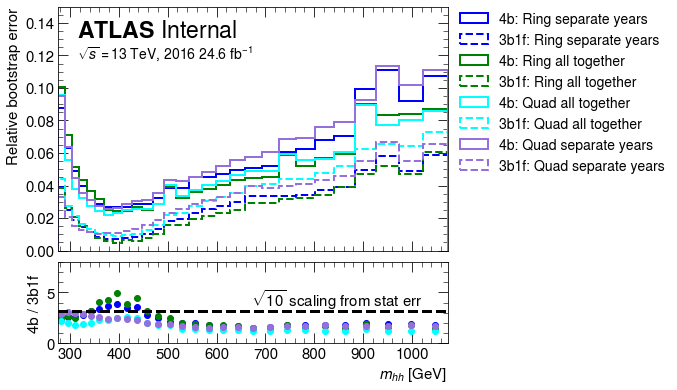

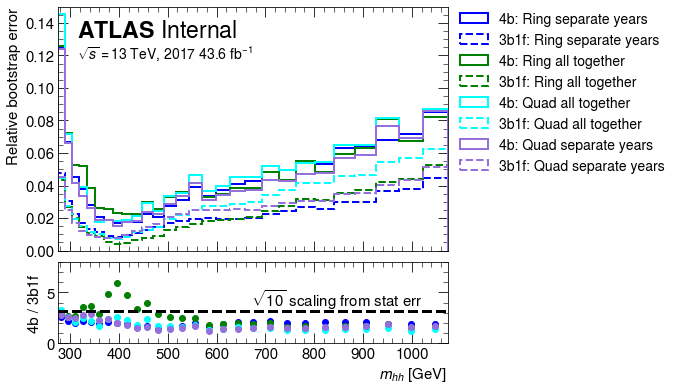

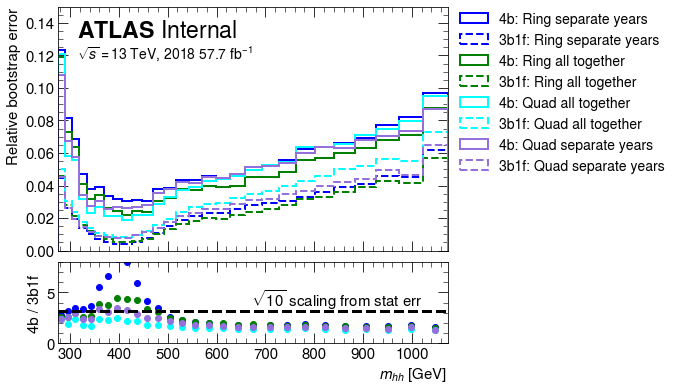

In [36]:
xx = 0.5 * ( e_p05[1:] + e_p05[:-1] )
lw = 2


for yr in [16,17,18]:

    fig, ax = plt.subplots(2,1, figsize=(6.75, 5.92), sharex=True,
                           gridspec_kw={"height_ratios": [.75, .25], "hspace":0.07, 
                                        "left":0.098, "bottom":0.09})

    for k, c,l in zip(['RSEP','ROHE','QOHE','QSEP'], #,'QSEP_CG'],
                      ['b','g','cyan','mediumpurple','darkorange'],
                      ['Ring separate years','Ring all together','Quad all together',
                       'Quad separate years','CG Quad sep years']):


        err_4b   = d[k][f'bs_{yr}']      / d[k][f'bkg_{yr}']
        err_3b1f = d[k][f'bs_3b1f_{yr}'] / d[k][f'bkg_3b1f_{yr}']

        ax[0].hist(xx,e_p05,histtype='step',lw=lw,color=c,label=f'4b: {l}',
                   weights= err_4b )
        ax[0].hist(xx,e_p05,histtype='step',lw=lw,color=c,label=f'3b1f: {l}',ls='--',
                   weights=err_3b1f)

        ax[1].plot(xx,err_4b/err_3b1f,marker='o',lw=0,color=c)


    ax[1].set_xlabel('$m_{hh}$ [GeV]',x=1,ha='right')
    ax[0].set_ylabel('Relative bootstrap error',y=1,ha='right')
    ax[1].set_ylabel('4b / 3b1f')

    ax[1].plot(e_p05,np.sqrt(10)*np.ones_like(e_p05),'k--')
    ax[1].set_xlim(e_p05[0],e_p05[-1])
    #ax[1].set_ylim(.8,1.2)

    ax[0].legend(bbox_to_anchor=(1,1.03))#loc='upper right')

    ax[0].text(0.05, 0.9, "$\mathbf{ATLAS}$ Internal", transform=ax[0].transAxes,
               va='center', ha='left', fontsize=23)

    ax[0].text(0.05, 0.81, '$\\sqrt{s} = 13$ TeV, 20%d %.1f fb$^{-1}$' % (yr,lumi[str(yr)]), 
               transform=ax[0].transAxes,va='center', ha='left', fontsize=14)

    ax[1].text(e_p05[-2],np.sqrt(10),r'$\sqrt{10}$ scaling from stat err',ha='right',va='bottom')
    
    ax[0].set_ylim(0,0.15)
    ax[1].set_ylim(0,8)
    
    plt.savefig(f'figures/ggF_PUSH/NP_split/BS_err_{yr}.pdf',bbox_inches='tight')
    

**Finally, let's include CG's line on this plot too** :)

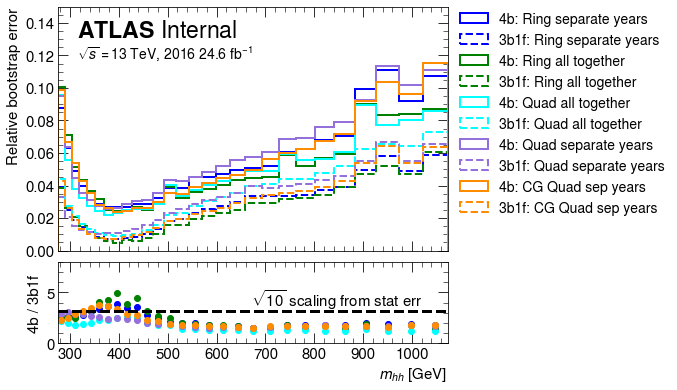

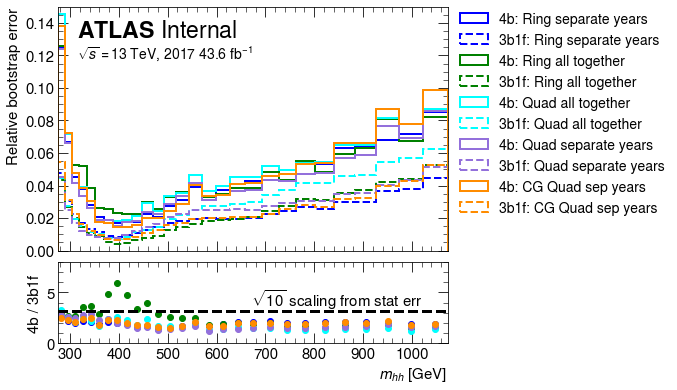

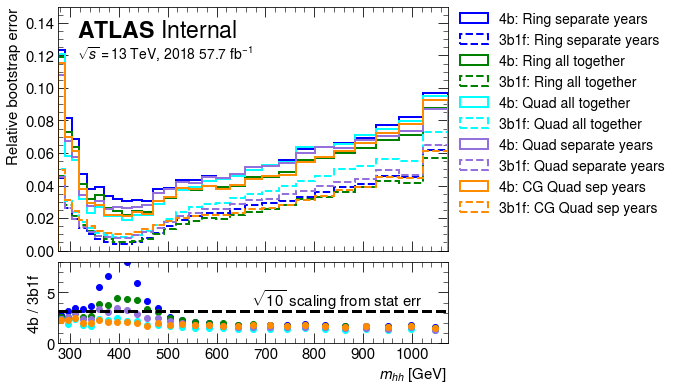

In [37]:
xx = 0.5 * ( e_p05[1:] + e_p05[:-1] )
lw = 2

# J b/c there are 2 configs w/ CG's dfs, make sure we're comparing the right SR
e_in = e_p05.copy().astype(float)
e_in[0] = 0
e_in[-1] = np.inf
get_hists(d['QSEP_CG'],e_in,True)

for yr in [16,17,18]:

    fig, ax = plt.subplots(2,1, figsize=(6.75, 5.92), sharex=True,
                           gridspec_kw={"height_ratios": [.75, .25], "hspace":0.07, 
                                        "left":0.098, "bottom":0.09})

    for k, c,l in zip(['RSEP','ROHE','QOHE','QSEP','QSEP_CG'],['b','g','cyan','mediumpurple','darkorange'],
                      ['Ring separate years','Ring all together',
                       'Quad all together','Quad separate years','CG Quad sep years']):


        err_4b   = d[k][f'bs_{yr}']      / d[k][f'bkg_{yr}']
        err_3b1f = d[k][f'bs_3b1f_{yr}'] / d[k][f'bkg_3b1f_{yr}']

        ax[0].hist(xx,e_p05,histtype='step',lw=lw,color=c,label=f'4b: {l}',
                   weights= err_4b )
        ax[0].hist(xx,e_p05,histtype='step',lw=lw,color=c,label=f'3b1f: {l}',ls='--',
                   weights=err_3b1f)

        ax[1].plot(xx,err_4b/err_3b1f,marker='o',lw=0,color=c)


    ax[1].set_xlabel('$m_{hh}$ [GeV]',x=1,ha='right')
    ax[0].set_ylabel('Relative bootstrap error',y=1,ha='right')
    ax[1].set_ylabel('4b / 3b1f')

    ax[1].plot(e_p05,np.sqrt(10)*np.ones_like(e_p05),'k--')
    ax[1].set_xlim(e_p05[0],e_p05[-1])
    #ax[1].set_ylim(.8,1.2)

    ax[0].legend(bbox_to_anchor=(1,1.03))#loc='upper right')

    ax[0].text(0.05, 0.9, "$\mathbf{ATLAS}$ Internal", transform=ax[0].transAxes,
               va='center', ha='left', fontsize=23)

    ax[0].text(0.05, 0.81, '$\\sqrt{s} = 13$ TeV, 20%d %.1f fb$^{-1}$' % (yr,lumi[str(yr)]), 
               transform=ax[0].transAxes,va='center', ha='left', fontsize=14)

    ax[1].text(e_p05[-2],np.sqrt(10),r'$\sqrt{10}$ scaling from stat err',ha='right',va='bottom')
    
    
    ax[0].set_ylim(0,0.15)
    ax[1].set_ylim(0,8)
    
    
    plt.savefig(f'figures/ggF_PUSH/NP_split/BS_err_{yr}_CG.pdf',bbox_inches='tight')
    

In [54]:
xx = 0.5 * ( e_p05[1:] + e_p05[:-1] )
lw = 2

# J b/c there are 2 configs w/ CG's dfs, make sure we're comparing the right SR
e_in = e_p05.copy().astype(float)
e_in[0] = 0
e_in[-1] = np.inf

In [39]:
d['QSEP'].keys()

dict_keys(['df_16', 'norm_16', 'norm_VR_16', 'norm_IQR_16', 'norm_3b1f_16', 'norm_VR_3b1f_16', 'norm_IQR_3b1f_16', 'df_17', 'norm_17', 'norm_VR_17', 'norm_IQR_17', 'norm_3b1f_17', 'norm_VR_3b1f_17', 'norm_IQR_3b1f_17', 'df_18', 'norm_18', 'norm_VR_18', 'norm_IQR_18', 'norm_3b1f_18', 'norm_VR_3b1f_18', 'norm_IQR_3b1f_18', 'bkg_16', 'b_vr_16', 'bs_16', 'poiss_16', 'lowHT_16', 'highHT_16', 'Q1_16', 'Q2_16', 'Q3_16', 'Q4_16', 'bkg_3b1f_16', 'b_vr_3b1f_16', 'bs_3b1f_16', 'poiss_3b1f_16', 'lowHT_3b1f_16', 'highHT_3b1f_16', 'Q1_3b1f_16', 'Q2_3b1f_16', 'Q3_3b1f_16', 'Q4_3b1f_16', 'obs_3b1f_16', 'bkg_17', 'b_vr_17', 'bs_17', 'poiss_17', 'lowHT_17', 'highHT_17', 'Q1_17', 'Q2_17', 'Q3_17', 'Q4_17', 'bkg_3b1f_17', 'b_vr_3b1f_17', 'bs_3b1f_17', 'poiss_3b1f_17', 'lowHT_3b1f_17', 'highHT_3b1f_17', 'Q1_3b1f_17', 'Q2_3b1f_17', 'Q3_3b1f_17', 'Q4_3b1f_17', 'obs_3b1f_17', 'bkg_18', 'b_vr_18', 'bs_18', 'poiss_18', 'lowHT_18', 'highHT_18', 'Q1_18', 'Q2_18', 'Q3_18', 'Q4_18', 'bkg_3b1f_18', 'b_vr_3b1f_18', '

In [59]:
%%bash
ls '../stats-results/ggF_PUSH/ws-3b1f-systs-HTcut-300.0-bkg-0.1-16-17-18-SM-HH-unblind-QSEP_res_p05_nomSR.json'

../stats-results/ggF_PUSH/ws-3b1f-systs-HTcut-300.0-bkg-0.1-16-17-18-SM-HH-unblind-QSEP_res_p05_nomSR.json


In [60]:
ws_file =  '../stats-results/ggF_PUSH/ws-3b1f-systs-HTcut-300.0-bkg-0.1-16-17-18-SM-HH-unblind-QSEP_res_p05_nomSR.json'

In [61]:
with open(ws_file) as f:
    ws = json.load(f)

In [62]:
len(ws['channels'])

3

In [63]:
ws['channels'][0]['samples'][1]['data']

[24.32616038874693,
 67.10258682342692,
 151.3586371723859,
 266.03089625753023,
 369.9648647455016,
 415.48867508958676,
 406.1974380728016,
 377.72549144386073,
 338.9108410888267,
 290.77143491624884,
 244.71456806556057,
 202.076157562587,
 173.4625632253883,
 139.2760650120058,
 112.85971292949762,
 91.15364238872553,
 71.75138218415941,
 56.79063841219477,
 47.966604667498814,
 38.12690684686822,
 27.650299525614628,
 21.64731576394297,
 17.208821431688648,
 13.289314996815847,
 9.704995552631317,
 8.089083321033286,
 5.3993435613920155,
 9.342191794871724]

In [64]:
df = d['QSEP']['df_16']

In [65]:
get_hists(d['QSEP'],e_in)

In [66]:
e_in

array([   0.,  289.,  303.,  318.,  334.,  351.,  369.,  387.,  406.,
        426.,  447.,  469.,  492.,  517.,  543.,  570.,  598.,  628.,
        659.,  692.,  727.,  763.,  801.,  841.,  883.,  927.,  973.,
       1022.,   inf])

**2016**

In [76]:
np.array(ws['channels'][0]['samples'][1]['modifiers'][0]['data'])  / np.array(ws['channels'][0]['samples'][1]['data'])

array([0.07797857, 0.04551275, 0.03082349, 0.02394971, 0.02098243,
       0.01973406, 0.02030684, 0.02125116, 0.02328622, 0.02524101,
       0.0287669 , 0.03304484, 0.03915085, 0.0429303 , 0.04838042,
       0.05375004, 0.05799917, 0.06791794, 0.07818055, 0.07726335,
       0.08596456, 0.09101534, 0.10343975, 0.11382932, 0.155923  ,
       0.21316291, 0.17759743, 0.15257113])

In [77]:
0.1*np.sqrt(d['QSEP']['bs_3b1f_16']**2 + 10 * d['QSEP']['poiss_3b1f_16']**2) / d['QSEP']['bkg_3b1f_16']

array([0.00779786, 0.00455127, 0.00308235, 0.00239497, 0.00209824,
       0.00197341, 0.00203068, 0.00212512, 0.00232862, 0.0025241 ,
       0.00287669, 0.00330448, 0.00391509, 0.00429303, 0.00483804,
       0.005375  , 0.00579992, 0.00679179, 0.00781806, 0.00772633,
       0.00859646, 0.00910153, 0.01034397, 0.01138293, 0.0155923 ,
       0.02131629, 0.01775974, 0.01525711])

**2017**

In [73]:
np.array(ws['channels'][1]['samples'][1]['modifiers'][0]['data'])  / np.array(ws['channels'][1]['samples'][1]['data'])

array([0.10611043, 0.05946625, 0.03764749, 0.02812983, 0.02281277,
       0.02119533, 0.0212229 , 0.02186875, 0.02410715, 0.02826092,
       0.0309171 , 0.03360484, 0.03874517, 0.04118697, 0.04527471,
       0.04824849, 0.04924336, 0.05168799, 0.05166111, 0.05710809,
       0.06730369, 0.07155367, 0.07080012, 0.08152454, 0.08888764,
       0.12583966, 0.12042903, 0.09846636])

In [75]:
0.1*np.sqrt(d['QSEP']['bs_3b1f_17']**2 + 10 * d['QSEP']['poiss_3b1f_17']**2) / d['QSEP']['bkg_3b1f_17']

array([0.01061104, 0.00594662, 0.00376475, 0.00281298, 0.00228128,
       0.00211953, 0.00212229, 0.00218688, 0.00241072, 0.00282609,
       0.00309171, 0.00336048, 0.00387452, 0.0041187 , 0.00452747,
       0.00482485, 0.00492434, 0.0051688 , 0.00516611, 0.00571081,
       0.00673037, 0.00715537, 0.00708001, 0.00815245, 0.00888876,
       0.01258397, 0.0120429 , 0.00984664])

**2018**

In [78]:
np.array(ws['channels'][2]['samples'][1]['modifiers'][0]['data'])  / np.array(ws['channels'][2]['samples'][1]['data'])

array([0.07253724, 0.0418937 , 0.02834224, 0.02094634, 0.0170815 ,
       0.01495596, 0.01518766, 0.0149785 , 0.01582495, 0.01788008,
       0.02011757, 0.02404969, 0.02804276, 0.03517714, 0.036083  ,
       0.040332  , 0.04082564, 0.04673189, 0.04997348, 0.05232487,
       0.05874218, 0.06639408, 0.0706736 , 0.07855026, 0.08374566,
       0.09931378, 0.10064601, 0.11543461])

In [79]:
0.1*np.sqrt(d['QSEP']['bs_3b1f_18']**2 + 10 * d['QSEP']['poiss_3b1f_18']**2) / d['QSEP']['bkg_3b1f_18']

array([0.00725372, 0.00418937, 0.00283422, 0.00209463, 0.00170815,
       0.0014956 , 0.00151877, 0.00149785, 0.0015825 , 0.00178801,
       0.00201176, 0.00240497, 0.00280428, 0.00351771, 0.0036083 ,
       0.0040332 , 0.00408256, 0.00467319, 0.00499735, 0.00523249,
       0.00587422, 0.00663941, 0.00706736, 0.00785503, 0.00837457,
       0.00993138, 0.0100646 , 0.01154346])

Yey! Sanity check *passed*, so now I'm ready to move on to the next step!